In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [ ]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

# - split data into batches
# - shuffling for dynamically changing fed forwarded data, resulting in diversity
# and ensure closeness to global minima
# (adds complexity by adding diversity ==> reduces overfitting)


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.62MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.67MB/s]


**Data Visualization & Analysis**

In [ ]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5,)) + np.array((0.5,))
  image = image.clip(0, 1)
  return image

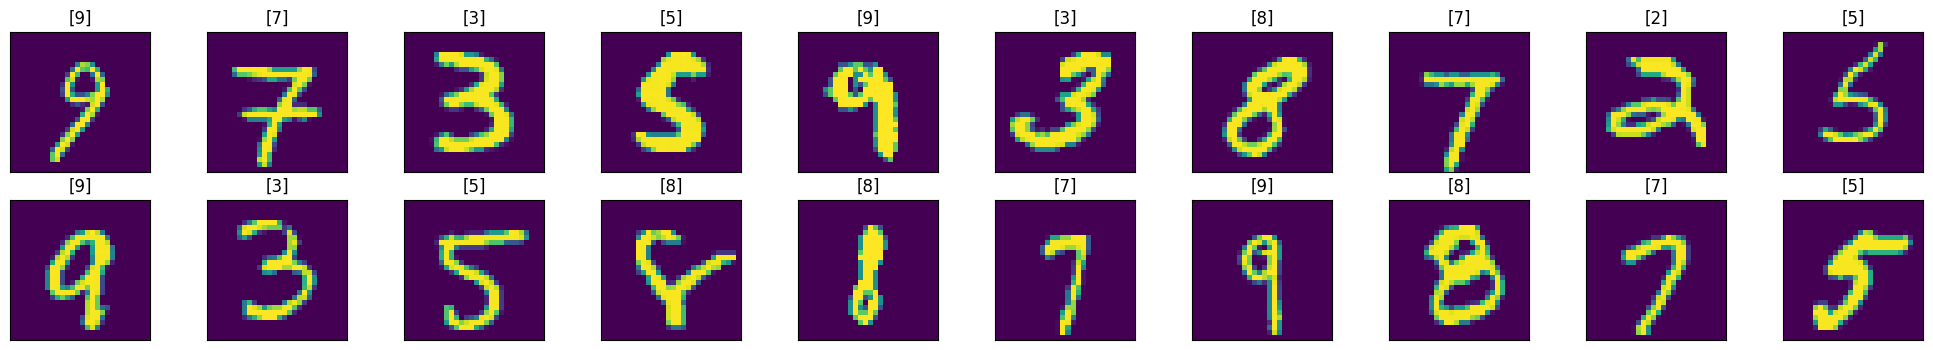

In [ ]:
dataiter = iter(training_loader)
img, label = next(dataiter)
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(img[idx]))
  ax.set_title([label[idx].item()])

**Constructing Digital Vision NN**

In [ ]:
class DigitalVNN(nn.Module):
  def __init__(self, input_dim, H1, H2, output_dim):
    super().__init__()
    self.layer1 = nn.Linear(input_dim, H1)
    self.layer2 = nn.Linear(H1, H2)
    self.layer3 = nn.Linear(H2, output_dim)
    self.activation = nn.ReLU()

  def forward(self, x):
    x = self.activation(self.layer1(x))
    x = self.activation(self.layer2(x))
    x = self.layer3(x)
    """
    The process of Layered Processing <==> Visual Cortex simulation
    """
    return x

In [ ]:
model = DigitalVNN((28 * 28), 128, 64, 10)
criterion = nn.CrossEntropyLoss() #log_softmax + NLLLoss()

# log_softmax:
# -Used when the loss function expects log-probabilities e.g.(NLLLoss())
# -More numerically stable because taking the log after softmax can cause underflow.
# -Output: A vector of log-probabilities (values are negative, sum of their exponentials is 1).

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
model

DigitalVNN(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (activation): ReLU()
)

**Digital Neuroplasticity Process**

In [ ]:
epochs = 15
running_loss_history = []
running_accuracy_history = []
val_running_loss_history = []
val_running_accuracy_history = []

for e in range(epochs):
  running_loss = 0.0
  running_accuracy = 0.0
  val_running_loss = 0.0
  val_running_accuracy = 0.0

  for images, labels in training_loader:
    inputs = images.view(images.shape[0], -1)
    scores = model.forward(inputs)

    loss = criterion(scores, labels)
    _, preds = torch.max(scores, 1)
    running_loss += loss.item()
    running_accuracy += torch.sum(preds == labels.data)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # Neuroplasticity in action

  else:
    with torch.no_grad():
      for val_images, val_labels in validation_loader:
        val_inputs = val_images.view(val_images.shape[0], -1)
        val_scores = model.forward(val_inputs)

        val_loss = criterion(val_scores, val_labels)
        _, val_preds = torch.max(val_scores, 1)
        val_running_loss += val_loss.item()
        val_running_accuracy += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_accuracy.float()/len(training_loader)
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_accuracy.float()/len(validation_loader)

    running_loss_history.append(epoch_loss)
    running_accuracy_history.append(epoch_acc)
    val_running_loss_history.append(val_epoch_loss)
    val_running_accuracy_history.append(val_epoch_acc)

    print(f'Epoch: {e+1} \nTraining/Validation Loss: {epoch_loss:.4f}/{val_epoch_loss:.4}')
    print(f'Training/Validation Accuracy: {epoch_acc:.4f}/{val_epoch_acc:.4f} ')
    print('---------------------------------------------------------------------')



Epoch: 1 
Training/Validation Loss: 0.9639/0.4249
Training/Validation Accuracy: 76.3750/88.6800 
---------------------------------------------------------------------
Epoch: 2 
Training/Validation Loss: 0.3758/0.3166
Training/Validation Accuracy: 89.4783/90.9800 
---------------------------------------------------------------------
Epoch: 3 
Training/Validation Loss: 0.3135/0.2837
Training/Validation Accuracy: 90.9100/91.9000 
---------------------------------------------------------------------
Epoch: 4 
Training/Validation Loss: 0.2814/0.2634
Training/Validation Accuracy: 91.8033/92.6400 
---------------------------------------------------------------------
Epoch: 5 
Training/Validation Loss: 0.2573/0.2405
Training/Validation Accuracy: 92.5183/93.0400 
---------------------------------------------------------------------
Epoch: 6 
Training/Validation Loss: 0.2362/0.2284
Training/Validation Accuracy: 93.1900/93.2800 
--------------------------------------------------------------------

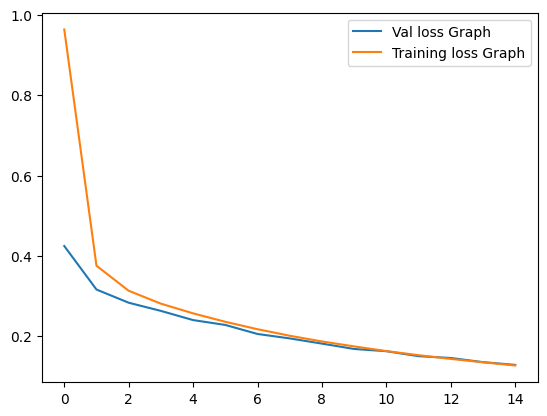

In [ ]:
plt.plot(val_running_loss_history, label="Val loss Graph")
plt.plot(running_loss_history, label="Training loss Graph")
plt.legend()

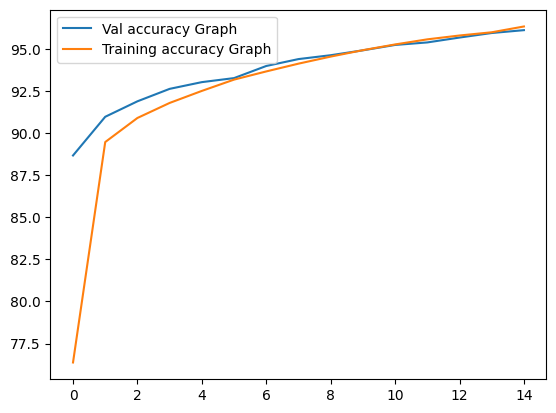

In [ ]:
plt.plot(val_running_accuracy_history, label="Val accuracy Graph")
plt.plot(running_accuracy_history, label="Training accuracy Graph")
plt.legend()

**Testing DVNN**

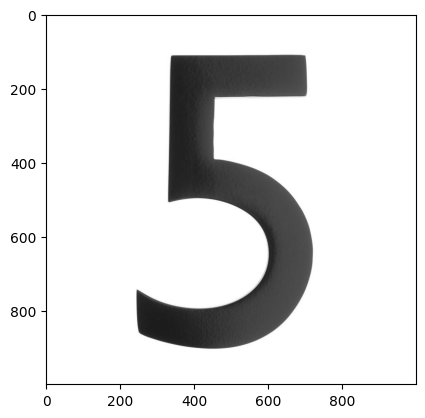

In [ ]:
import requests
import PIL.ImageOps
from PIL import Image

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

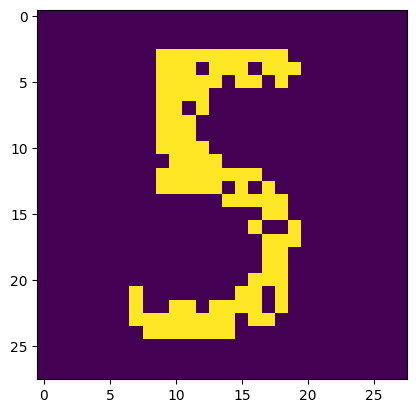

In [ ]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))


In [ ]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)
print(pred.item())

5


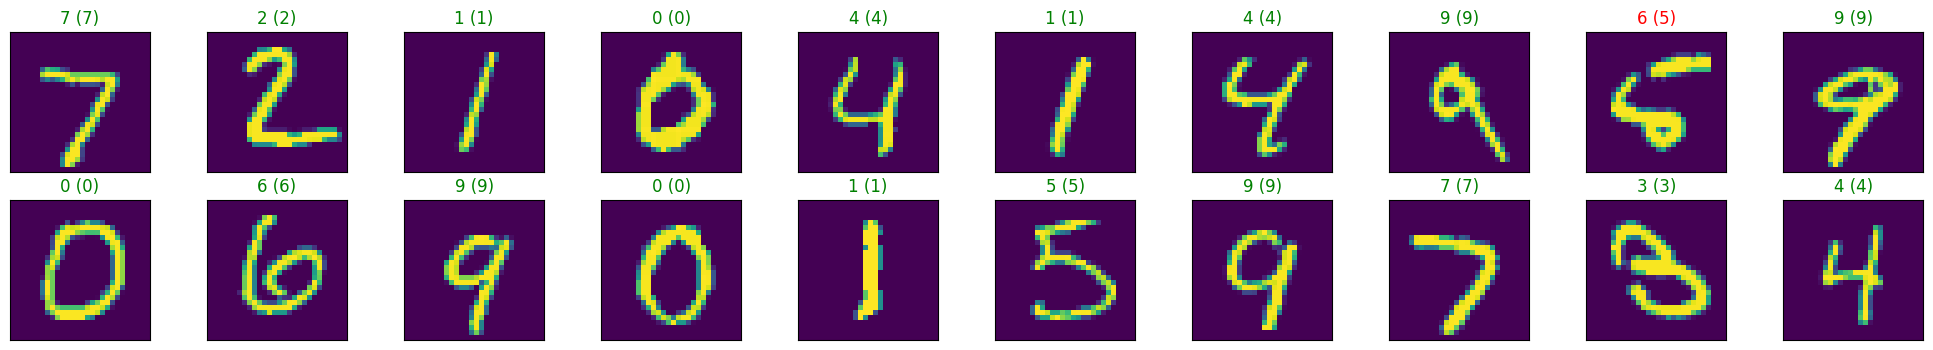

In [ ]:
dataiter = iter(validation_loader)
images, labels = next(dataiter)
images_ = images.view(images.shape[0], -1)
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))
